_Importing Required Libraries_

In [1]:
pip install hampel

Note: you may need to restart the kernel to use updated packages.


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import keras
import tensorflow as tf
from hampel import hampel
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from matplotlib import pyplot
from numpy import array
import matplotlib.pyplot as plt

### generating vanderpol oscillator data (position and velocity) using range kutta method

In [59]:
from data_gen.vander_poll import rk4
from data_gen.shm import shm
from data_gen.lorenz import lorenz

In [36]:
def vanderpol(x, y, mu):
  return (y, mu*(1-x**2)*y - x)

mu = 4  # Parameter for nonlinearity
t_start = 0  # Starting time
t_end = 70  # End time
dt = 0.04  # Time step 
x0 = 1  # Initial position
y0 = 0  # Initial velocity

# Initialize lists for storing data
t = []
x = []
y = []

# Simulate using RK4
t.append(t_start)
x.append(x0)
y.append(y0)

for i in range(int((t_end - t_start) / dt)):
  next_point = rk4(vanderpol, x[-1], y[-1], dt, mu)
  t.append(t[-1] + dt)
  x.append(next_point[0])
  y.append(next_point[1])

print("Time:", t)
print("x:", x)
print("dx/dt:", y)

with open("../Dataset/van_der_pol_data.dat", "wb") as file:

  for i in range(len(t)):
    velocity_bytes = str(y[i]).encode() + b' '  # Add space after converting to bytes
    position_bytes = str(x[i]).encode() + b'\n'  # Add newline after converting to bytes
    file.write(velocity_bytes)
    file.write(position_bytes)

Time: [0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24000000000000002, 0.28, 0.32, 0.36, 0.39999999999999997, 0.43999999999999995, 0.4799999999999999, 0.5199999999999999, 0.5599999999999999, 0.6, 0.64, 0.68, 0.7200000000000001, 0.7600000000000001, 0.8000000000000002, 0.8400000000000002, 0.8800000000000002, 0.9200000000000003, 0.9600000000000003, 1.0000000000000002, 1.0400000000000003, 1.0800000000000003, 1.1200000000000003, 1.1600000000000004, 1.2000000000000004, 1.2400000000000004, 1.2800000000000005, 1.3200000000000005, 1.3600000000000005, 1.4000000000000006, 1.4400000000000006, 1.4800000000000006, 1.5200000000000007, 1.5600000000000007, 1.6000000000000008, 1.6400000000000008, 1.6800000000000008, 1.7200000000000009, 1.760000000000001, 1.800000000000001, 1.840000000000001, 1.880000000000001, 1.920000000000001, 1.960000000000001, 2.000000000000001, 2.040000000000001, 2.080000000000001, 2.120000000000001, 2.160000000000001, 2.200000000000001, 2.240000000000001, 2.280000000000001, 2.320000000000001

In [32]:
def plot_initial_graphs(time, velocity, position):
    plt.figure(figsize=(10, 6))
    plt.plot(time, position, label="Position")
    plt.xlabel("Time")
    plt.ylabel("Position")
    plt.title("Position vs Time")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(time, velocity, label="Velocity", color="orange")
    plt.xlabel("Time")
    plt.ylabel("Velocity")
    plt.title("Velocity vs Time")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(position, velocity, label="Velocity", color="orange")
    plt.xlabel("Postion")
    plt.ylabel("Velocity")
    plt.title("Position vs Velocity")
    plt.legend()
    plt.grid(True)
    plt.show()


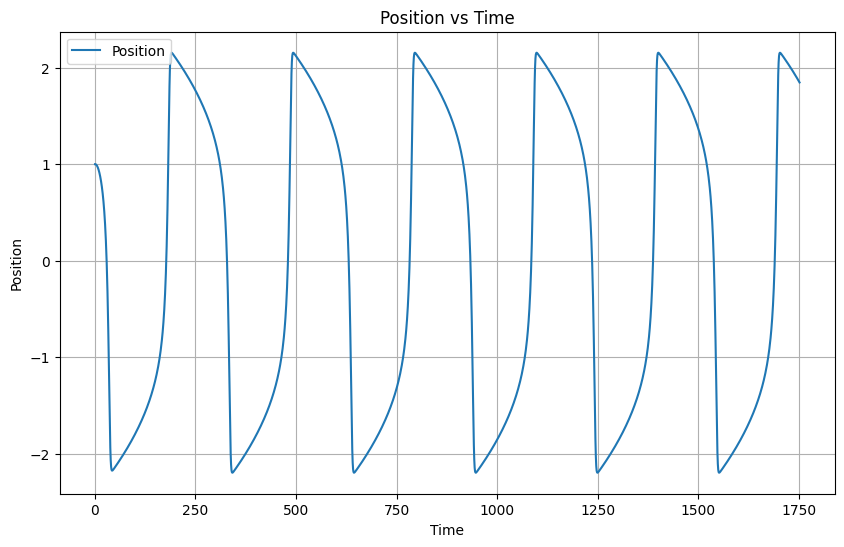

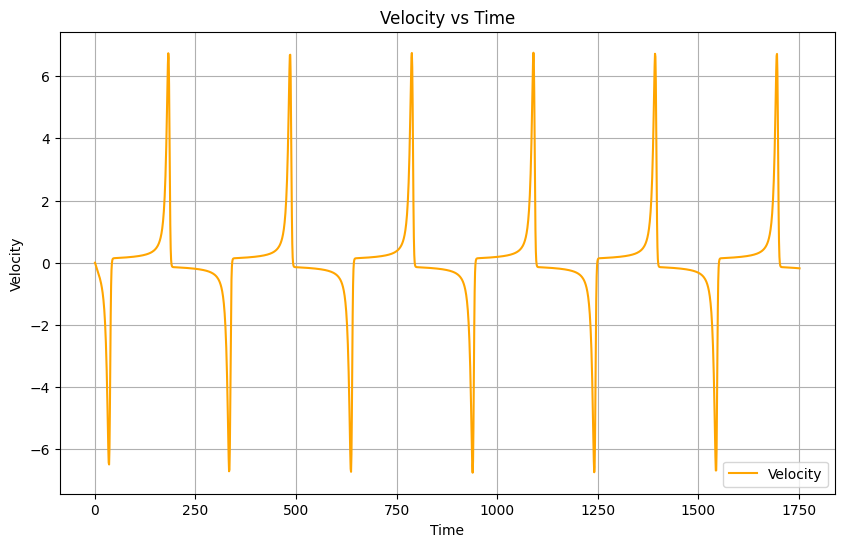

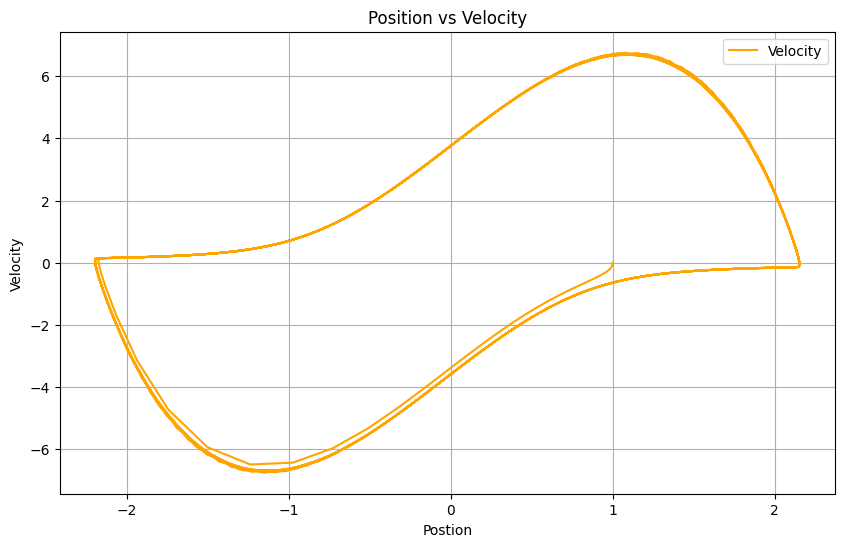

In [34]:
data = np.loadtxt("../Dataset/van_der_pol_data.dat")

# Extract columns from the data
time= np.arange(1,data.shape[0]+1)
velocity = data[:, 0]
position = data[:, 1]

plot_initial_graphs(time, velocity, position)

### generating shm data (position and velocity) using range kutta method

(a) For undamped SHM

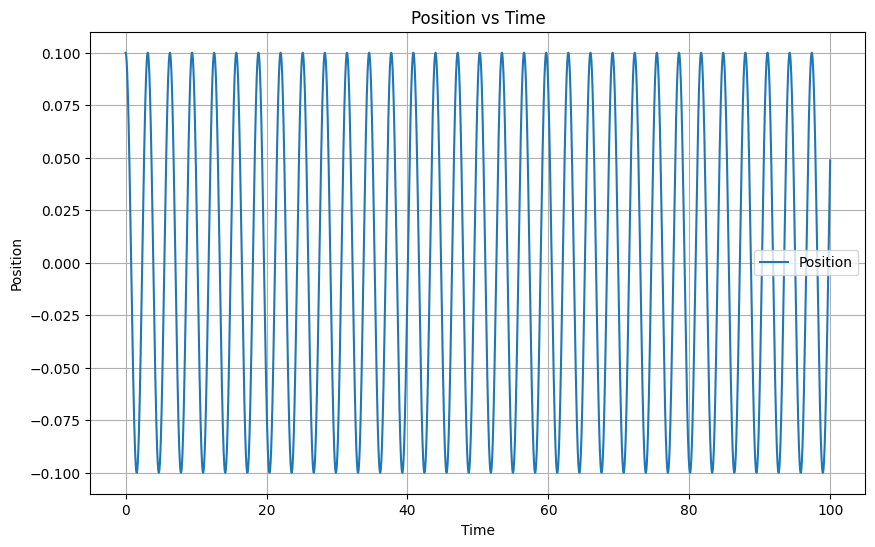

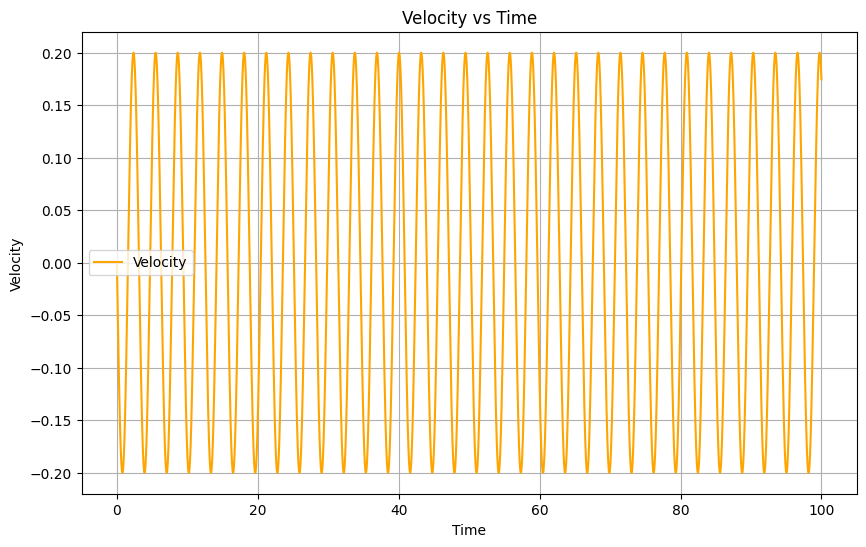

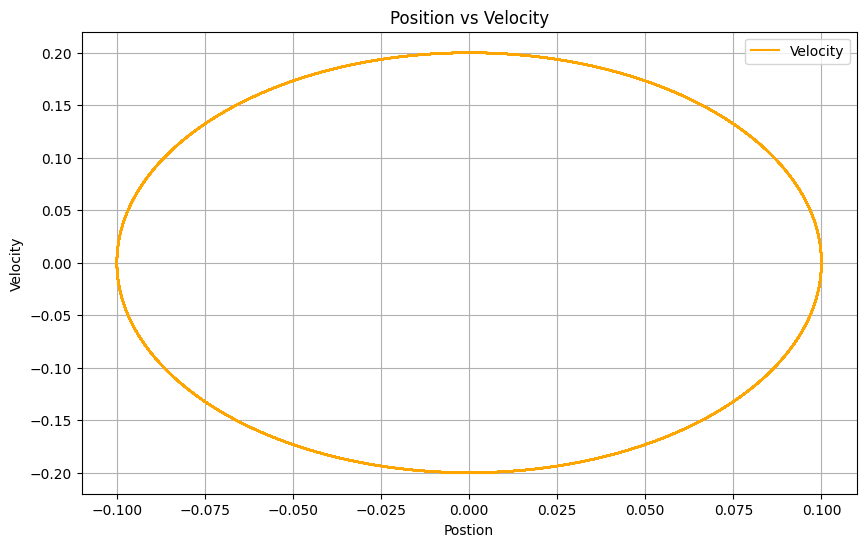

In [60]:
import numpy as np

# Example usage
mass = 1.0  # kg
spring_constant = 4.0  # N/m
initial_position = 0.1  # m
initial_velocity = 0.0  # m/s
time_step = 0.01  # s
num_steps = 10000

time, position, velocity = shm(mass, spring_constant, initial_position, initial_velocity, time_step, num_steps)

plot_initial_graphs(time, velocity, position)

  # for i in range(len(t)):
    # Convert velocity and position to bytes before writing
    # velocity_bytes = str(velocity[i]).encode() + b' '  # Add space after converting to bytes
    # position_bytes = str(position[i]).encode() + b'\n'  # Add newline after converting to bytes
    # file.write(velocity_bytes)
    # file.write(position_bytes)


(b) For damped Simple Harmonic Oscillation

In [39]:
def shm(x, y, omega):
  return (y, - (omega**2)*x)

# Define parameters
omega = 2*np.pi  # Angular frequency (can be adjusted)
t_start = 0  # Starting time
t_end = 70  # End time
dt = 0.01  # Time step
x0 = 1  # Initial position
y0 = 0  # Initial velocity (can be set to non-zero for initial momentum)

t = []
x = []
y = []

# Simulate using RK4
t.append(t_start)
x.append(x0)
y.append(y0)

for i in range(int((t_end - t_start) / dt)):
  next_point = rk4(shm, x[-1], y[-1], dt, omega)
  t.append(t[-1] + dt)
  x.append(next_point[0])
  y.append(next_point[1])

with open("../Dataset/shm_data_damped.dat", "wb") as file:

  for i in range(len(t)):
    # Convert velocity and position to bytes before writing
    velocity_bytes = str(y[i]).encode() + b' '  # Add space after converting to bytes
    position_bytes = str(x[i]).encode() + b'\n'  # Add newline after converting to bytes
    file.write(velocity_bytes)
    file.write(position_bytes)


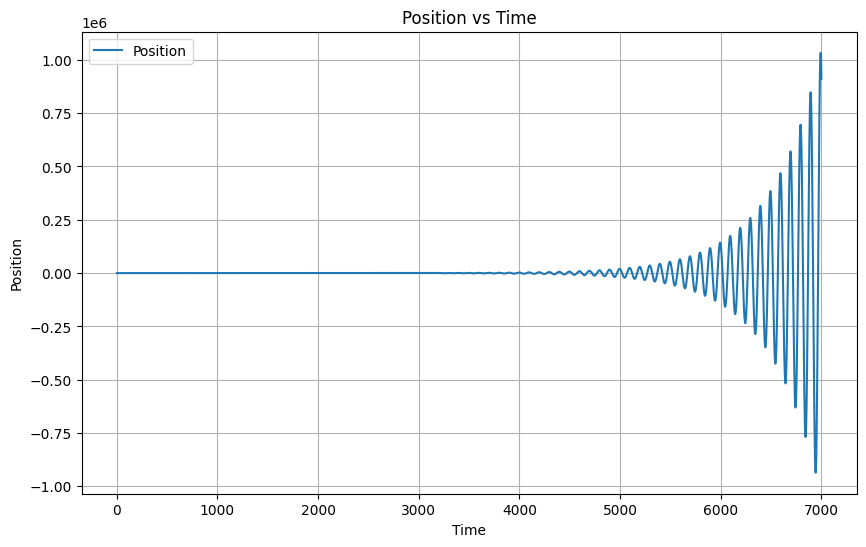

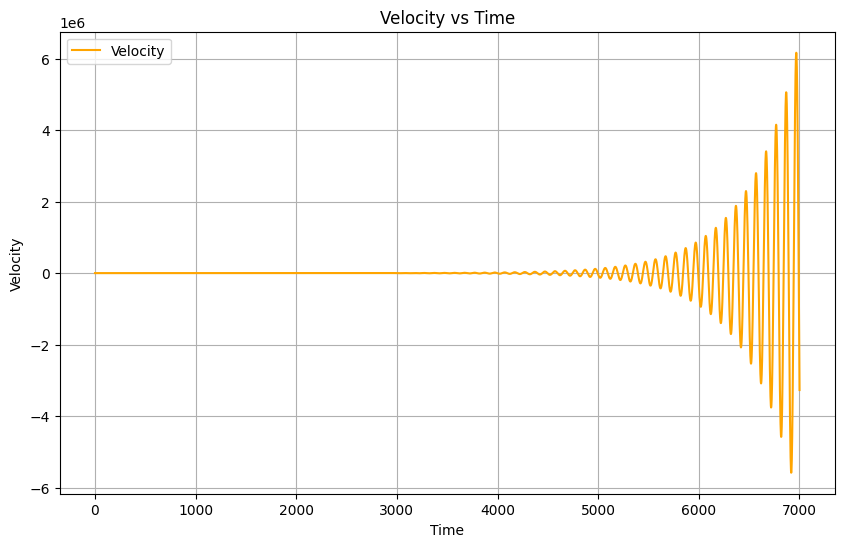

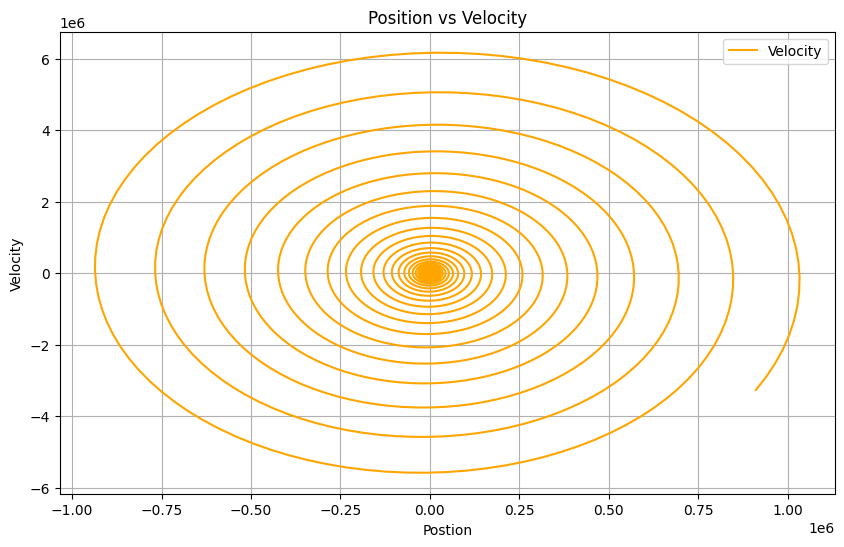

In [40]:
data = np.loadtxt("../Dataset/shm_data_damped.dat")

# Extract columns from the data
time= np.arange(1,data.shape[0]+1)
velocity = data[:, 0]
position = data[:, 1]

plot_initial_graphs(time, velocity, position)


## Pretraining

The `van_der_pol_intermittency.dat` feeds the model with the dynamics of the Van der Pol Oscillator

In [8]:
data1 = np.genfromtxt('../Dataset/van_der_pol_intermittency.dat')
training_set1 = pd.DataFrame(data1).reset_index(drop=True)
training_set1 = training_set1.iloc[:,1]

data2 = np.genfromtxt('../Dataset/van_der_pol_data.dat')
training_set2 = pd.DataFrame(data2).reset_index(drop=True)
training_set2 = training_set2.iloc[:,1]

data3 = np.genfromtxt('../Dataset/shm_data.dat')
training_set3 = pd.DataFrame(data3).reset_index(drop=True)
training_set3 = training_set3.iloc[:,1]

data4 = np.genfromtxt('../Dataset/shm_data_damped.dat')
training_set4 = pd.DataFrame(data4).reset_index(drop=True)
training_set4 = training_set4.iloc[:,1]

## Computing the Gradients

_Calculating the value of_ $\frac{dx}{dt}$, _and_ $\frac{d^2x}{dt^2}$

In [18]:
# split a sequence into samples
def Supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n_in, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n_out)
    for i in range(0, n_out):
      cols.append(df.shift(-i))
      if i == 0:
        names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
      else:
        names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
       agg.dropna(inplace=True)
    return agg

In [19]:
data = Supervised(df.values, n_in = 35, n_out = 10)
#data.drop(['var2(t-10)', 'var3(t-10)', 'var2(t-9)', 'var3(t-9)', 'var2(t-8)',
#       'var3(t-8)', 'var2(t-7)', 'var3(t-7)', 'var2(t-6)', 'var3(t-6)',
#       'var2(t-5)', 'var3(t-5)', 'var2(t-4)', 'var3(t-4)', 'var2(t-2)',
#       'var3(t-2)', 'var2(t-1)', 'var3(t-1)','var2(t-3)', 'var3(t-3)'], axis = 1, inplace = True)


data.drop(['var2(t-35)', 'var3(t-35)', 'var2(t-34)', 'var3(t-34)', 'var2(t-33)',
       'var3(t-33)', 'var2(t-32)', 'var3(t-32)', 'var2(t-31)', 'var3(t-31)',
    'var2(t-30)', 'var3(t-30)', 'var2(t-29)', 'var3(t-29)', 'var2(t-28)',
       'var3(t-28)', 'var2(t-27)', 'var3(t-27)', 'var2(t-26)', 'var3(t-26)',
       'var2(t-25)', 'var3(t-25)', 'var2(t-24)', 'var3(t-24)', 'var2(t-22)',
       'var3(t-22)', 'var2(t-21)', 'var3(t-21)','var2(t-23)', 'var3(t-23)',
       'var2(t-20)', 'var3(t-20)', 'var2(t-19)', 'var3(t-19)', 'var2(t-18)',
       'var3(t-18)', 'var2(t-17)', 'var3(t-17)', 'var2(t-16)', 'var3(t-16)',
       'var2(t-15)', 'var3(t-15)', 'var2(t-14)', 'var3(t-14)', 'var2(t-12)',
       'var3(t-12)', 'var2(t-13)', 'var3(t-13)', 'var3(t-11)', 'var2(t-11)', 'var3(t-11)',
       'var2(t-10)', 'var3(t-10)', 'var2(t-9)', 'var3(t-9)', 'var2(t-8)',
       'var3(t-8)', 'var2(t-7)', 'var3(t-7)', 'var2(t-6)', 'var3(t-6)',
       'var2(t-5)', 'var3(t-5)', 'var2(t-4)', 'var3(t-4)', 'var2(t-2)',
       'var3(t-2)', 'var2(t-3)', 'var3(t-3)'], axis = 1, inplace = True)

print(data.head())
print(data.columns)

    var1(t-35)  var1(t-34)  var1(t-33)  var1(t-32)  var1(t-31)  var1(t-30)  \
35    0.000000    2.980000    4.633333    1.233333    3.700000    1.480000   
36    2.980000    4.633333    1.233333    3.700000    1.480000    6.300000   
37    4.633333    1.233333    3.700000    1.480000    6.300000    7.142857   
38    1.233333    3.700000    1.480000    6.300000    7.142857   12.500000   
39    3.700000    1.480000    6.300000    7.142857   12.500000    7.400000   

    var1(t-29)  var1(t-28)  var1(t-27)  var1(t-26)  ...  var3(t+6)  var1(t+7)  \
35    6.300000    7.142857   12.500000    7.400000  ...  -0.000027   7.416667   
36    7.142857   12.500000    7.400000   10.571429  ...  -0.000023   6.085714   
37   12.500000    7.400000   10.571429   13.228571  ...  -0.000020   4.333333   
38    7.400000   10.571429   13.228571    4.633333  ...  -0.000017  10.183333   
39   10.571429   13.228571    4.633333    0.616667  ...  -0.000014   8.485714   

    var2(t+7)  var3(t+7)  var1(t+8)  var2(t+

In [61]:
from pinn import PINN

### shm